In [ ]:
# A PROGRAM TO PREDICT INSURANCE CHARGES FOR AN INDIVIDUAL BASED ON THAT INDIVIDUAL'S CHARACTERISTICS

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

## Data Preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\shane\Documents\ITMLA2-B44\Datasets-20241123\insurance.csv")

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Visualisation

In [27]:
gender_counts = df['sex'].value_counts()
df_grouped = df.groupby(['age', 'sex', 'region']).size().reset_index(name='count')

df_grouped.head()
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     370 non-null    int64 
 1   sex     370 non-null    object
 2   region  370 non-null    object
 3   count   370 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.7+ KB


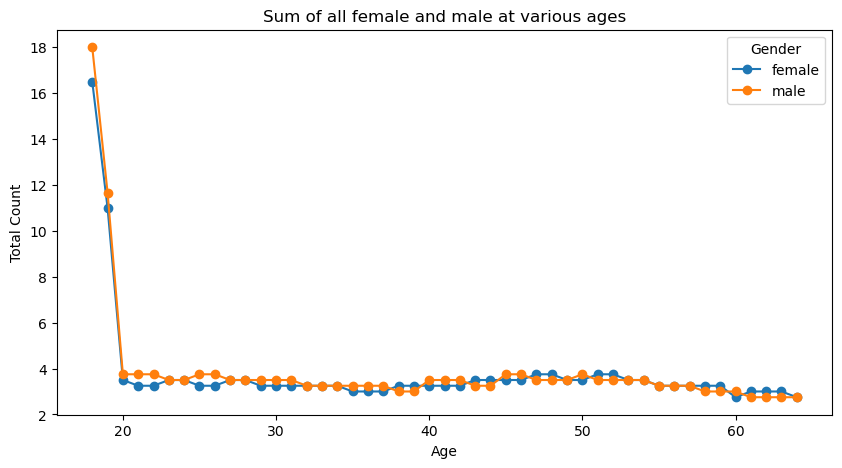

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

df_grouped_pivot = df_grouped.pivot_table(index='age', columns='sex', values='count')

df_grouped_pivot.plot(kind='line', marker='o', figsize=(10,5))

plt.xlabel('Age')
plt.ylabel('Total Count')
plt.title('Sum of all female and male at various ages')
plt.legend(title='Gender')
plt.grid(False)

plt.show()

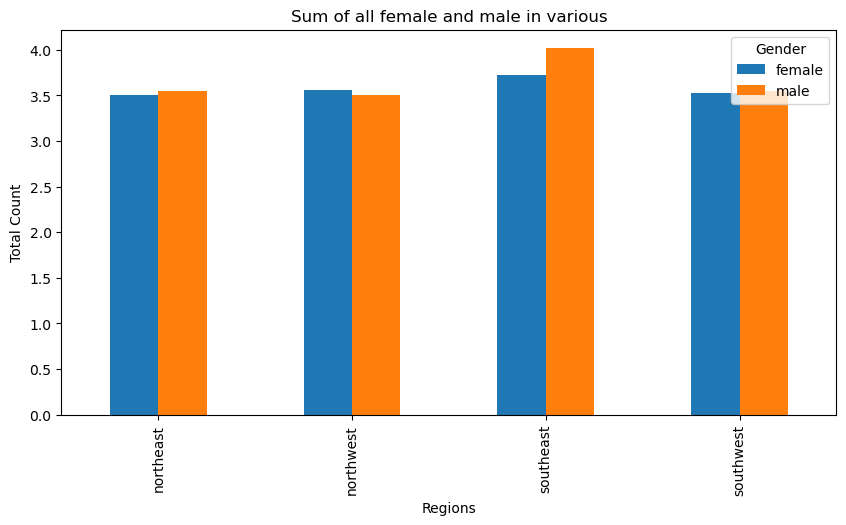

In [48]:
df_pivot = df_grouped.pivot_table(index='region', columns='sex', values='count')

df_pivot.plot(kind='bar', figsize=(10,5))

plt.xlabel('Regions')
plt.ylabel('Total Count')
plt.title('Sum of all female and male in various')
plt.legend(title='Gender')

plt.show()

## Ecnoding Categorical Values

In [73]:
categorical_columns = df.select_dtypes(include=['object']).columns

LB = LabelEncoder()
for col in categorical_columns:
    df[col] = LB.fit_transform(df[col])

## Feature Selection

In [74]:
X = df.drop(columns='charges')
y = df['charges']

model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

rankings = pd.DataFrame({'feature': X.columns, 'Ranking': rfe.ranking_})
print('n\Feature Rankings (RFE):')
print(rankings.sort_values('Ranking'))

n\Feature Rankings (RFE):
    feature  Ranking
0       age        1
2       bmi        1
3  children        1
4    smoker        1
5    region        1
1       sex        2


In [75]:
y = np.log1p(y) # USING A LOG FUNCTION AS THE Mean Squared Error WAS RETURNING 6-10 FIGURES

## Standardization and Splitting

In [76]:
X = df[['age', 'bmi', 'children', 'smoker', 'region']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [77]:
model2 = RandomForestRegressor()
model2.fit(X_train_scaled, y_train)

RandomForestRegressor()

## Evaluating the model

In [78]:
y_pred = model2.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Model Evaluation: ')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-Squared (R2): {r2}')

Model Evaluation: 
Mean Squared Error (MSE): 0.1284612307381374
R-Squared (R2): 0.8570831936123613


## Performing predictions using the model

In [79]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [80]:
new_data = pd.DataFrame ({
    'age': [25],
    'sex': ['male'],
    'bmi': [30.5],
    'children': [0],
    'smoker': ['yes'],
    'region': ['southwest']
}, {
    'age': [40],
    'sex': ['female'],
    'bmi': [23.6],
    'children': [3],
    'smoker': ['no'],
    'region': ['northwest']})

for col in categorical_columns:
    new_data[col] = LB.fit_transform(new_data[col])

In [81]:

new_data_scaled = Scaler.transform(new_data.drop(column='sex'))
prediction = model2.predict(new_data_scaled)

print('\nPrediction for new data (insurance charges):', prediction)


Prediction for new data (insurance charges): [7.96768701 7.96768701 7.96768701 7.96768701 7.96768701 7.96768701]
